Logistic Regression - Accuracy: 0.869, AUC: 0.960
Decision Tree - Accuracy: 0.738, AUC: 0.741
Random Forest - Accuracy: 0.885, AUC: 0.938
SVM - Accuracy: 0.918, AUC: 0.959


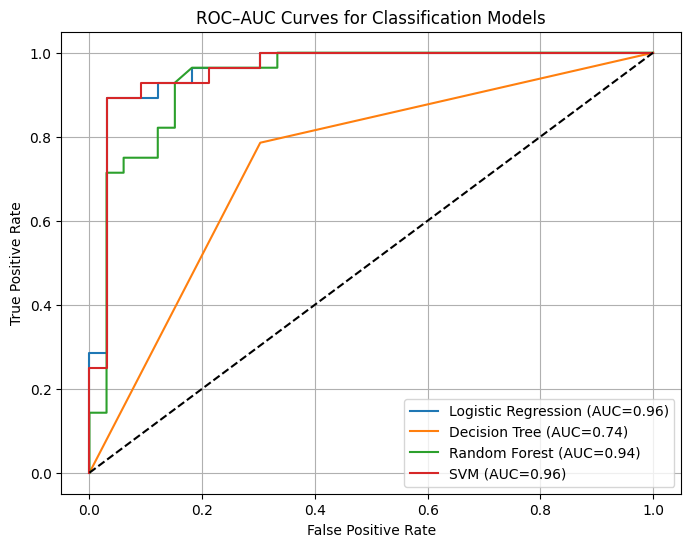

In [1]:
# 04_supervised_learning.ipynb

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# --- Load preprocessed dataset ---
df_clean = pd.read_csv("heart_disease_clean.csv")

# --- Prepare final feature set ---
# (you can adjust the features selected based on previous notebook)
X = df_clean.drop("num", axis=1)
y = (df_clean["num"] > 0).astype(int)  # binary target: 0=no disease, 1=disease

# Standardize continuous features
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
scaler = StandardScaler()
X[continuous_features] = scaler.fit_transform(X[continuous_features])

# --- Train/Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Models ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42)
}

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]
    
    # Accuracy & AUC
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    print(f"{name} - Accuracy: {acc:.3f}, AUC: {auc_score:.3f}")
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

# Baseline line
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Curves for Classification Models")
plt.legend()
plt.grid(True)
plt.show()
